# Criteo Uplift Dataset - Exploratory Data Analysis

This notebook performs EDA on the Criteo Uplift dataset, a benchmark for uplift modeling research.

**Dataset Overview:**
- ~14M rows from a randomized controlled trial
- 12 anonymized features (f0-f11)
- Treatment indicator and outcome variables


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.4f}'.format)

%matplotlib inline


## 1. Load the Data


In [31]:
# Load the full dataset from parquet
df = pd.read_parquet('../data/raw/criteo_uplift.parquet')

print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1e9:.2f} GB")


Dataset shape: (13979592, 16)
Memory usage: 1.79 GB


In [32]:
# First few rows
df.head(10)


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
0,12.6164,10.0597,8.9764,4.6799,10.2805,4.1155,0.2944,4.8338,3.9554,13.1901,5.3004,-0.1687,1,0,0,0
1,12.6164,10.0597,9.0027,4.6799,10.2805,4.1155,0.2944,4.8338,3.9554,13.1901,5.3004,-0.1687,1,0,0,0
2,12.6164,10.0597,8.9648,4.6799,10.2805,4.1155,0.2944,4.8338,3.9554,13.1901,5.3004,-0.1687,1,0,0,0
3,12.6164,10.0597,9.0028,4.6799,10.2805,4.1155,0.2944,4.8338,3.9554,13.1901,5.3004,-0.1687,1,0,0,0
4,12.6164,10.0597,9.0380,4.6799,10.2805,4.1155,0.2944,4.8338,3.9554,13.1901,5.3004,-0.1687,1,0,0,0
5,12.6164,10.0597,8.9045,4.6799,10.2805,4.1155,0.2944,4.8338,3.9554,13.1901,5.3004,-0.1687,1,0,0,0
6,12.6164,10.0597,8.7833,4.6799,10.2805,4.1155,0.2944,4.8338,3.9554,13.1901,5.3004,-0.1687,1,0,0,0
7,12.6164,10.0597,8.9645,4.6799,10.2805,4.1155,0.2944,4.8338,3.9554,13.1901,5.3004,-0.1687,1,0,0,0
8,12.6164,10.0597,9.0378,4.6799,10.2805,4.1155,0.2944,4.8338,3.9554,13.1901,5.3004,-0.1687,1,0,0,0
9,12.6164,10.0597,9.0151,4.6799,10.2805,4.1155,0.2944,4.8338,3.9554,13.1901,5.3004,-0.1687,1,0,0,0


In [33]:
# Data types and info
print("Data Types:")
print(df.dtypes)
print(f"\nMemory per column:")
print(df.memory_usage(deep=True) / 1e6)


Data Types:
f0            float64
f1            float64
f2            float64
f3            float64
f4            float64
f5            float64
f6            float64
f7            float64
f8            float64
f9            float64
f10           float64
f11           float64
treatment       int64
conversion      int64
visit           int64
exposure        int64
dtype: object

Memory per column:
Index          0.0001
f0           111.8367
f1           111.8367
f2           111.8367
f3           111.8367
f4           111.8367
f5           111.8367
f6           111.8367
f7           111.8367
f8           111.8367
f9           111.8367
f10          111.8367
f11          111.8367
treatment    111.8367
conversion   111.8367
visit        111.8367
exposure     111.8367
dtype: float64


In [34]:
# Summary statistics for all columns
df.describe()


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,treatment,conversion,visit,exposure
count,13979592.0000,13979592.0000,13979592.0000,13979592.0000,13979592.0000,13979592.0000,13979592.0000,13979592.0000,13979592.0000,13979592.0000,13979592.0000,13979592.0000,13979592.0000,13979592.0000,13979592.0000,13979592.0000
mean,19.6203,10.0700,8.4466,4.1789,10.3388,4.0285,-4.1554,5.1018,3.9336,16.0276,5.3334,-0.1710,0.8500,0.0029,0.0470,0.0306
std,5.3775,0.1048,0.2993,1.3366,0.3433,0.4311,4.5779,1.2052,0.0567,7.0190,0.1682,0.0228,0.3571,0.0539,0.2116,0.1723
min,12.6164,10.0597,8.2144,-8.3984,10.2805,-9.0119,-31.4298,4.8338,3.6351,13.1901,5.3004,-1.3839,0.0000,0.0000,0.0000,0.0000
25%,12.6164,10.0597,8.2144,4.6799,10.2805,4.1155,-6.6993,4.8338,3.9108,13.1901,5.3004,-0.1687,1.0000,0.0000,0.0000,0.0000
50%,21.9234,10.0597,8.2144,4.6799,10.2805,4.1155,-2.4111,4.8338,3.9719,13.1901,5.3004,-0.1687,1.0000,0.0000,0.0000,0.0000
75%,24.4365,10.0597,8.7233,4.6799,10.2805,4.1155,0.2944,4.8338,3.9719,13.1901,5.3004,-0.1687,1.0000,0.0000,0.0000,0.0000
max,26.7453,16.3442,9.0520,4.6799,21.1235,4.1155,0.2944,11.9984,3.9719,75.2950,6.4739,-0.1687,1.0000,1.0000,1.0000,1.0000


In [35]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values per column:")
print(missing[missing > 0] if missing.sum() > 0 else "No missing values!")


Missing values per column:
No missing values!


## 3. Target Variables Analysis


In [36]:
# Treatment distribution
print("=" * 50)
print("TREATMENT DISTRIBUTION")
print("=" * 50)
treatment_counts = df['treatment'].value_counts()
treatment_pct = df['treatment'].value_counts(normalize=True) * 100

print(f"Control (0): {treatment_counts[0]:,} ({treatment_pct[0]:.2f}%)")
print(f"Treatment (1): {treatment_counts[1]:,} ({treatment_pct[1]:.2f}%)")


TREATMENT DISTRIBUTION
Control (0): 2,096,937 (15.00%)
Treatment (1): 11,882,655 (85.00%)


### 📝 Note: Why is Treatment 85% and Control only 15%?

This seems backwards compared to typical product A/B tests — but it makes sense for **advertising**!

**In a product A/B test:**
- You're testing something risky (new feature, UI change)
- If it's bad, you don't want to hurt too many users
- So you keep treatment small (~10-15%) and control large (~85-90%)

**In an ad campaign (like this dataset):**
- Showing ads = making money 💰
- Every user in the control group = an ad you *didn't* show = lost revenue
- So you want to show ads to as many people as possible
- The 15% control is just enough to measure "did the ad actually work?"

**Bottom line:** The split depends on the *risk* of the treatment.
- Risky treatment → small treatment group
- Revenue-generating treatment → large treatment group, small holdout

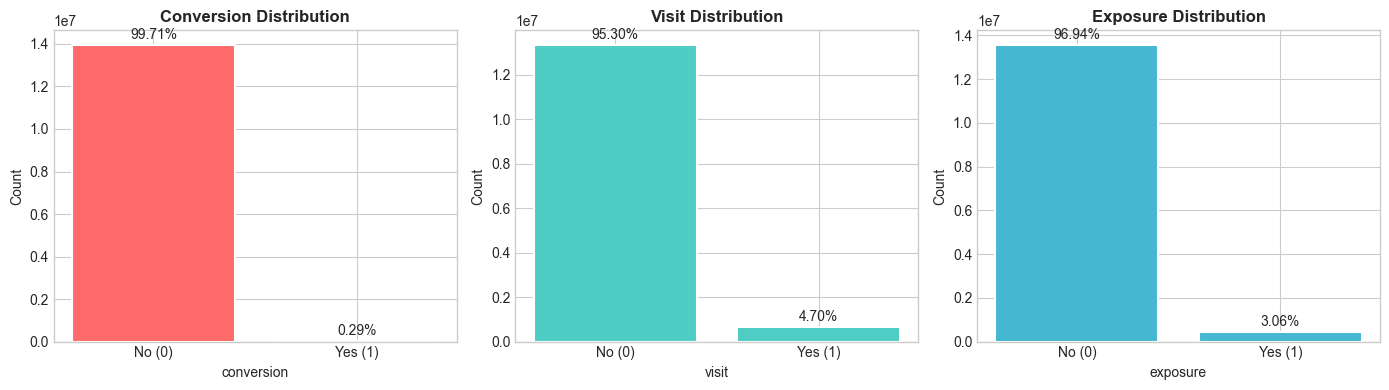

In [37]:
# Outcome variables distribution
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

outcomes = ['conversion', 'visit', 'exposure']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for ax, outcome, color in zip(axes, outcomes, colors):
    counts = df[outcome].value_counts().sort_index()
    bars = ax.bar(counts.index, counts.values, color=color, edgecolor='white', linewidth=1.5)
    ax.set_title(f'{outcome.title()} Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel(outcome)
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No (0)', 'Yes (1)'])
    
    # Add percentage labels
    total = counts.sum()
    for bar, count in zip(bars, counts.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + total*0.01, 
                f'{count/total*100:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


In [38]:
# Outcome rates summary
print("\nOutcome Rates:")
print("-" * 30)
for outcome in outcomes:
    rate = df[outcome].mean() * 100
    print(f"{outcome.title()}: {rate:.4f}%")



Outcome Rates:
------------------------------
Conversion: 0.2917%
Visit: 4.6992%
Exposure: 3.0631%


**Outcome Distribution (All Users):**
- Conversion: 0.29% — extremely rare, typical for marketing
- Visit: 4.70% — low but more common than conversion
- Exposure: 3.06% — not all treatment users actually saw the ad

These are heavily imbalanced — most users don't convert. This matters for model evaluation {Accuracy is misleading (predicting "no conversion" for everyone = 99% accuracy but useless)} and explains why uplift modeling focuses on finding the small subset where treatment changes behavior.

In [39]:
# Analyze conversion rates across feature quantiles
# Using f0 as an example

# duplicates='drop' handles cases where quantile boundaries have identical values
sample['f0_quartile'] = pd.qcut(sample['f0'], q=4, labels=False, duplicates='drop')

uplift_by_quartile = sample.groupby(['f0_quartile', 'treatment'])['conversion'].mean().unstack()
uplift_by_quartile.columns = ['Control', 'Treatment']
uplift_by_quartile['Uplift'] = uplift_by_quartile['Treatment'] - uplift_by_quartile['Control']
uplift_by_quartile.index = [f'Q{i+1}' for i in uplift_by_quartile.index]

print("Conversion Rate and Uplift by f0 Quartile:")
uplift_by_quartile


Conversion Rate and Uplift by f0 Quartile:


,Control,Treatment,Uplift
Q1,0.0031,0.0060,0.0029
Q2,0.0003,0.0008,0.0005
Q3,0.0005,0.0005,-0.0000


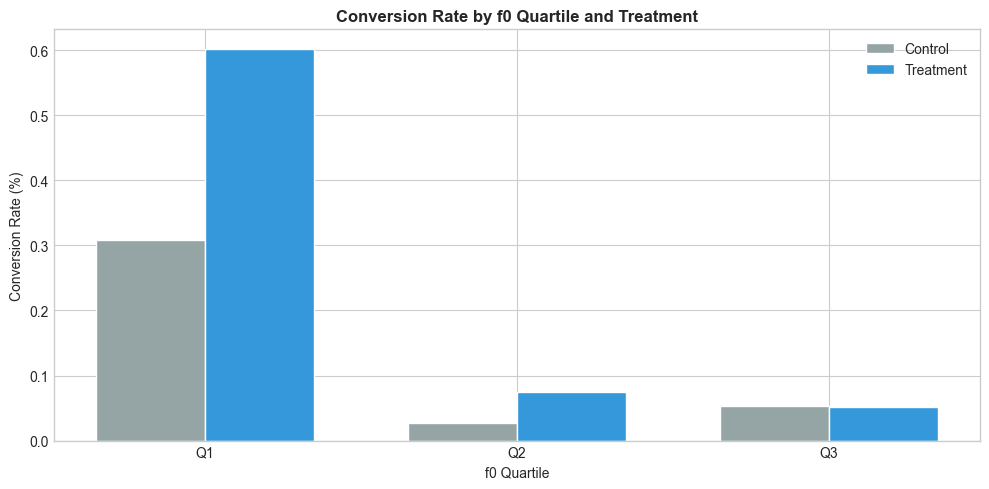

In [40]:
# Visualize uplift heterogeneity
fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(len(uplift_by_quartile))
width = 0.35

bars1 = ax.bar(x - width/2, uplift_by_quartile['Control'] * 100, width, 
               label='Control', color='#95A5A6', edgecolor='white')
bars2 = ax.bar(x + width/2, uplift_by_quartile['Treatment'] * 100, width, 
               label='Treatment', color='#3498DB', edgecolor='white')

ax.set_xlabel('f0 Quartile')
ax.set_ylabel('Conversion Rate (%)')
ax.set_title('Conversion Rate by f0 Quartile and Treatment', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(uplift_by_quartile.index)
ax.legend()

plt.tight_layout()
plt.show()


In [41]:
# Final summary
print("=" * 60)
print("CRITEO UPLIFT DATASET - SUMMARY")
print("=" * 60)
print(f"\nTotal samples: {len(df):,}")
print(f"Number of features: {len(feature_cols)}")
print(f"\nTreatment/Control split:")
print(f"  - Control: {(df['treatment'] == 0).sum():,} ({(df['treatment'] == 0).mean()*100:.1f}%)")
print(f"  - Treatment: {(df['treatment'] == 1).sum():,} ({(df['treatment'] == 1).mean()*100:.1f}%)")
print(f"\nOutcome rates:")
print(f"  - Conversion: {df['conversion'].mean()*100:.4f}%")
print(f"  - Visit: {df['visit'].mean()*100:.4f}%")
print(f"  - Exposure: {df['exposure'].mean()*100:.4f}%")
print(f"\nAverage Treatment Effect (ATE) on conversion: {ate*100:.4f} percentage points")
print(f"Relative uplift: {relative_lift:.2f}%")


CRITEO UPLIFT DATASET - SUMMARY

Total samples: 13,979,592
Number of features: 12

Treatment/Control split:
  - Control: 2,096,937 (15.0%)
  - Treatment: 11,882,655 (85.0%)

Outcome rates:
  - Conversion: 0.2917%
  - Visit: 4.6992%
  - Exposure: 3.0631%

Average Treatment Effect (ATE) on conversion: 0.1152 percentage points
Relative uplift: 59.45%


---

## 🚀 Production Pipeline: Save Artifacts

Save EDA visualizations and summary data for Streamlit dashboard.


In [42]:
from pathlib import Path

# Create directories
project_root = Path('..').resolve()
viz_images_dir = project_root / 'visualizations' / 'images'
viz_data_dir = project_root / 'visualizations' / 'data'

for dir_path in [viz_images_dir, viz_data_dir]:
    dir_path.mkdir(parents=True, exist_ok=True)

print("Directories ready for saving EDA artifacts")


Directories ready for saving EDA artifacts


In [43]:
# Save EDA summary statistics
print("Saving EDA summary data...")

# Dataset overview
eda_summary = {
    'Metric': [
        'Total Samples', 'Number of Features',
        'Control Samples', 'Treatment Samples',
        'Control %', 'Treatment %',
        'Conversion Rate %', 'Visit Rate %', 'Exposure Rate %',
        'ATE (percentage points)', 'Relative Lift %'
    ],
    'Value': [
        len(df), len(feature_cols),
        (df['treatment'] == 0).sum(), (df['treatment'] == 1).sum(),
        (df['treatment'] == 0).mean() * 100, (df['treatment'] == 1).mean() * 100,
        df['conversion'].mean() * 100, df['visit'].mean() * 100, df['exposure'].mean() * 100,
        ate * 100, relative_lift
    ]
}
eda_summary_df = pd.DataFrame(eda_summary)
eda_summary_df.to_csv(viz_data_dir / 'nb01_eda_summary.csv', index=False)
print(f"✅ EDA summary saved: nb01_eda_summary.csv")


Saving EDA summary data...
✅ EDA summary saved: nb01_eda_summary.csv


In [44]:
# Save outcome distribution data
outcome_data = []
for outcome in ['conversion', 'visit', 'exposure']:
    counts = df[outcome].value_counts().sort_index()
    for val, count in counts.items():
        outcome_data.append({
            'outcome': outcome,
            'value': val,
            'count': count,
            'percentage': count / len(df) * 100
        })

outcome_df = pd.DataFrame(outcome_data)
outcome_df.to_csv(viz_data_dir / 'nb01_outcome_distribution.csv', index=False)
print(f"✅ Outcome distribution saved: nb01_outcome_distribution.csv")


✅ Outcome distribution saved: nb01_outcome_distribution.csv


In [45]:
# Save treatment distribution data
treatment_dist = pd.DataFrame({
    'group': ['Control', 'Treatment'],
    'treatment_value': [0, 1],
    'count': [treatment_counts[0], treatment_counts[1]],
    'percentage': [treatment_pct[0], treatment_pct[1]]
})
treatment_dist.to_csv(viz_data_dir / 'nb01_treatment_distribution.csv', index=False)
print(f"✅ Treatment distribution saved: nb01_treatment_distribution.csv")


✅ Treatment distribution saved: nb01_treatment_distribution.csv


In [46]:
# Save uplift by quartile data
uplift_by_quartile_export = uplift_by_quartile.reset_index()
uplift_by_quartile_export.columns = ['Quartile', 'Control_Rate', 'Treatment_Rate', 'Uplift']
uplift_by_quartile_export.to_csv(viz_data_dir / 'nb01_uplift_by_quartile.csv', index=False)
print(f"✅ Uplift by quartile saved: nb01_uplift_by_quartile.csv")


✅ Uplift by quartile saved: nb01_uplift_by_quartile.csv


In [47]:
# Save feature statistics
feature_stats = df[feature_cols].describe().T
feature_stats['unique_values'] = [df[col].nunique() for col in feature_cols]
feature_stats.to_csv(viz_data_dir / 'nb01_feature_statistics.csv')
print(f"✅ Feature statistics saved: nb01_feature_statistics.csv")


✅ Feature statistics saved: nb01_feature_statistics.csv


In [48]:
# Save visualization images
print("\nSaving EDA visualization images...")

# 1. Outcome Distribution
fig, axes = plt.subplots(1, 3, figsize=(14, 4))
outcomes = ['conversion', 'visit', 'exposure']
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for ax, outcome, color in zip(axes, outcomes, colors):
    counts = df[outcome].value_counts().sort_index()
    bars = ax.bar(counts.index, counts.values, color=color, edgecolor='white', linewidth=1.5)
    ax.set_title(f'{outcome.title()} Distribution', fontsize=12, fontweight='bold')
    ax.set_xlabel(outcome)
    ax.set_ylabel('Count')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['No (0)', 'Yes (1)'])
    
    total = counts.sum()
    for bar, count in zip(bars, counts.values):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + total*0.01, 
                f'{count/total*100:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig(viz_images_dir / 'nb01_outcome_distribution.png', dpi=150, bbox_inches='tight')
plt.close()
print(f"✅ Saved: nb01_outcome_distribution.png")



Saving EDA visualization images...
✅ Saved: nb01_outcome_distribution.png


In [49]:
# 2. Treatment Distribution Pie Chart
fig, ax = plt.subplots(figsize=(8, 6))
colors_pie = ['#95A5A6', '#3498DB']
explode = (0, 0.05)

ax.pie([treatment_counts[0], treatment_counts[1]], 
       explode=explode,
       labels=['Control (15%)', 'Treatment (85%)'],
       colors=colors_pie,
       autopct='%1.1f%%',
       startangle=90,
       textprops={'fontsize': 12})
ax.set_title('Treatment vs Control Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig(viz_images_dir / 'nb01_treatment_distribution.png', dpi=150, bbox_inches='tight')
plt.close()
print(f"✅ Saved: nb01_treatment_distribution.png")


✅ Saved: nb01_treatment_distribution.png


In [50]:
# 3. Uplift by Quartile
fig, ax = plt.subplots(figsize=(10, 5))

x = np.arange(len(uplift_by_quartile))
width = 0.35

bars1 = ax.bar(x - width/2, uplift_by_quartile['Control'] * 100, width, 
               label='Control', color='#95A5A6', edgecolor='white')
bars2 = ax.bar(x + width/2, uplift_by_quartile['Treatment'] * 100, width, 
               label='Treatment', color='#3498DB', edgecolor='white')

ax.set_xlabel('f0 Quartile')
ax.set_ylabel('Conversion Rate (%)')
ax.set_title('Conversion Rate by f0 Quartile and Treatment', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(uplift_by_quartile.index)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(viz_images_dir / 'nb01_uplift_by_quartile.png', dpi=150, bbox_inches='tight')
plt.close()
print(f"✅ Saved: nb01_uplift_by_quartile.png")


✅ Saved: nb01_uplift_by_quartile.png


In [52]:
# 4. ATE Summary Bar
# Calculate ATE values from the dataframe (self-contained)
ctrl_rate = df[df['treatment'] == 0]['conversion'].mean()
treat_rate = df[df['treatment'] == 1]['conversion'].mean()
ate = treat_rate - ctrl_rate
relative_lift = (ate / ctrl_rate) * 100 if ctrl_rate > 0 else 0

fig, ax = plt.subplots(figsize=(8, 5))

rates = [ctrl_rate * 100, treat_rate * 100]
colors_ate = ['#95A5A6', '#3498DB']
bars = ax.bar(['Control', 'Treatment'], rates, color=colors_ate, edgecolor='white', linewidth=2)

# Add value labels
for bar, rate in zip(bars, rates):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
            f'{rate:.4f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add ATE annotation
ax.annotate(f'ATE: +{ate*100:.4f} pp\n({relative_lift:.1f}% lift)', 
            xy=(0.5, max(rates) * 0.7), ha='center', fontsize=12,
            bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

ax.set_ylabel('Conversion Rate (%)')
ax.set_title('Average Treatment Effect on Conversion', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(rates) * 1.3)
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig(viz_images_dir / 'nb01_ate_comparison.png', dpi=150, bbox_inches='tight')
plt.close()
print(f"✅ Saved: nb01_ate_comparison.png")


✅ Saved: nb01_ate_comparison.png


In [53]:
print("\n" + "="*60)
print("✅ ALL NOTEBOOK 01 EDA ARTIFACTS SAVED SUCCESSFULLY!")
print("="*60)
print("\n📊 Data files:")
print("  - nb01_eda_summary.csv")
print("  - nb01_outcome_distribution.csv")
print("  - nb01_treatment_distribution.csv")
print("  - nb01_uplift_by_quartile.csv")
print("  - nb01_feature_statistics.csv")
print("\n🖼️ Image files:")
print("  - nb01_outcome_distribution.png")
print("  - nb01_treatment_distribution.png")
print("  - nb01_uplift_by_quartile.png")
print("  - nb01_ate_comparison.png")



✅ ALL NOTEBOOK 01 EDA ARTIFACTS SAVED SUCCESSFULLY!

📊 Data files:
  - nb01_eda_summary.csv
  - nb01_outcome_distribution.csv
  - nb01_treatment_distribution.csv
  - nb01_uplift_by_quartile.csv
  - nb01_feature_statistics.csv

🖼️ Image files:
  - nb01_outcome_distribution.png
  - nb01_treatment_distribution.png
  - nb01_uplift_by_quartile.png
  - nb01_ate_comparison.png
